# CH 2.1
![2.1ex](https://raw.githubusercontent.com/ellickhou/Entrance-exam-of-Taiwan-AI-Academy/master/Notes-of-Beginning-Statistics/img/2.1ex.png?token=ALBR66QOCOFH43QJG4ERRCC5D5HA6)

[9, 12, 13, 14, 14, 15, 15, 15, 15, 15, 15, 16, 16, 16, 17, 18, 18, 19, 19, 20]
[0.05, 0.0, 0.0, 0.05, 0.05, 0.1, 0.3, 0.15, 0.05, 0.1, 0.1, 0.05]
[0.05, 0.05, 0.05, 0.1, 0.15000000000000002, 0.25, 0.55, 0.7000000000000001, 0.7500000000000001, 0.8500000000000001, 0.9500000000000001, 1.0]


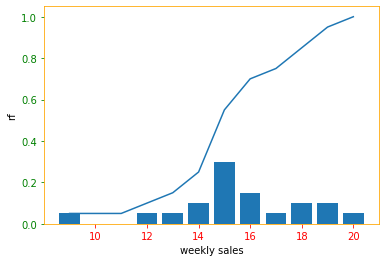

Ans:1)19, 2)20


In [63]:
import matplotlib.pyplot as plt
ds = [20, 15, 14, 14, 18, 15, 17, 16, 16, 18, 15, 19, 12, 13, 9,
      19, 15, 15, 16, 15]
ds_sorted = sorted(ds)
rf_ds = [ds.count(i)/ len(ds) for i in range(9,21) ]
sum_rf_ds = [sum(rf_ds[0:i])for i in range (1,13)]
print(ds_sorted)
print(rf_ds)
print(sum_rf_ds)
fig = plt.figure()
ax = fig.add_subplot()
with plt.rc_context({ 'axes.edgecolor':'orange', 
                     'xtick.color':'red', 'ytick.color':'green', 'figure.facecolor':'white'}):
    ax.bar([i for i in range(9,21)], rf_ds, label='rf')
    ax.plot([i for i in range(9,21)], sum_rf_ds, label='sum of rf')
    ax.set_xlabel("weekly sales")
    ax.set_ylabel("rf")

plt.show()
print("Ans:1)19, 2)20")

# CH 2.2 
![2.2ex](https://raw.githubusercontent.com/ellickhou/Entrance-exam-of-Taiwan-AI-Academy/master/Notes-of-Beginning-Statistics/img/2.2ex.png?token=ALBR66R4DOC2GCSTU6QRBS25D5HDM)

In [89]:
import numpy as np
import statistics as stat
# A.
ds = np.array([5, -2, 6, 14, -3, 0, 1, 4, 3, 2, 5])
print("(a)","np",np.mean(ds), np.median(ds),"numpy沒有'mode' function", sep = "\n")
DS = [5, -2, 6, 14, -3, 0, 1, 4, 3, 2, 5]
print("stat", stat.mean(DS), stat.median(DS), stat.mode(DS), sep = "\n")
print("stat for np.array", stat.mean(ds), stat.median(ds), stat.mode(ds), sep = "\n")
print("\033[1;33m*np.array用np, list用stat\033[0m")
# B.
DS2 = [DS[i] + 3 for i in range(0,11)]
print("(b)", stat.mean(DS2), stat.median(DS2), stat.mode(DS2), sep = "\n")
# C.
DS3 = [DS[i] - 6 for i in range(0,11)]
print("(c)", stat.mean(DS3), stat.median(DS3), stat.mode(DS3), sep = "\n")


(a)
np
3.1818181818181817
3.0
numpy沒有'mode' function
stat
3.1818181818181817
3
5
stat for np.array
3
3
5
*np.array用np, list用stat
(b)
6.181818181818182
6
8
(c)
-2.8181818181818183
-3
-1


# CH 2.3
